In [2]:
import pandas as pd
df_merge = pd.read_excel('과일쇼피인사이트_통합.xlsx')

In [3]:
#1. 모듈 및 함수 불러오기 및 폰트설정
from matplotlib import rc, font_manager
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

font_url = 'C:/Windows/Fonts/SDMISAENG (1).ttf'
font_name = font_manager.FontProperties(fname=font_url).get_name()
print(font_name)
plt.rcParams["font.family"] = font_name
rc('font', family=font_name)
plt.rcParams["font.size"] = 40

Sandoll MiSaeng


In [15]:
#1. 모듈 및 함수 불러오기
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#2. 변수 지정(독립변수)

#총 항목
#['사과', '배', '토마토', '감귤', '딸기', '블루베리', '석류', '감', '매실', '멜론', '복분자',
# 수박', '키위', '참외', '천혜향', '한라봉', '포도', '자두', '복숭아', '리치', '체리',
#'레몬', '망고', '바나나', '오렌지', '자몽', '파인애플', '과일바구니', '혼합과일세트']

#결과값에 해당하는 과일은 num에서 제거해주어야 합니다.아래 예는 매실을 제외해주었습니다.
num=['사과', '배', '토마토', '감귤', '딸기', '블루베리', '석류', '감', '멜론', '복분자',
       '수박', '키위', '참외', '천혜향', '한라봉', '포도', '자두', '복숭아', '리치', '체리',
      '레몬', '망고', '바나나', '오렌지', '매실', '파인애플', '과일바구니', '혼합과일세트']
X = df_merge[num]
prospect_fruit = '자몽'
Y = df_merge[prospect_fruit]

#3. 데이터 분할(학습용/평가용 데이터 세트)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#1. 모듈 및 함수 불러오기
from sklearn.linear_model import Ridge

#2. 모형 학습 및 예측
Rr=Ridge(random_state=0).fit(X_train, Y_train)
Y_pred = Rr.predict(X_test)
#print('평가용 데이터 세트에 대한 예측값\n', Y_pred)

In [16]:
#로지스틱 회귀모형으로 다른 과일들의 수치를 바탕으로 예측해본 매실의 수치
comparison = pd.DataFrame({'prediction(예측값)':Y_pred, 'ground_truth(실제값)':Y_test})
comparison.head(20)

,prediction(예측값),ground_truth(실제값)
1016,51.688401,31.60074
445,9.707071,6.27459
458,10.149215,11.57589
251,13.670124,14.01946
980,30.255759,26.25802
152,9.653894,6.87512
569,14.504545,13.00476
1057,32.813093,25.59536
241,7.752222,14.90991
381,7.817041,6.33671


In [17]:
print("학습용 데이터 세트 결정게수:{:.3f}".format(Rr.score(X_train, Y_train)))
print("평가용 데이터 세트 결정계수:{:.3f}".format(Rr.score(X_test, Y_test)))

학습용 데이터 세트 결정게수:0.750
평가용 데이터 세트 결정계수:0.748


In [18]:
print('절편: ', np.round(Rr.intercept_, 3))
print('가중치: ', np.round(Rr.coef_, 3))

절편:  -2.697
가중치:  [ 0.387 -0.193 -0.148  0.015 -0.31   0.049 -0.062  0.044  0.153 -0.085
  0.044  0.534 -0.028  0.017  0.024 -0.35  -0.03   0.006  0.038 -0.096
  0.089 -0.009  0.017  0.14   0.039  0.047  0.151 -0.179]


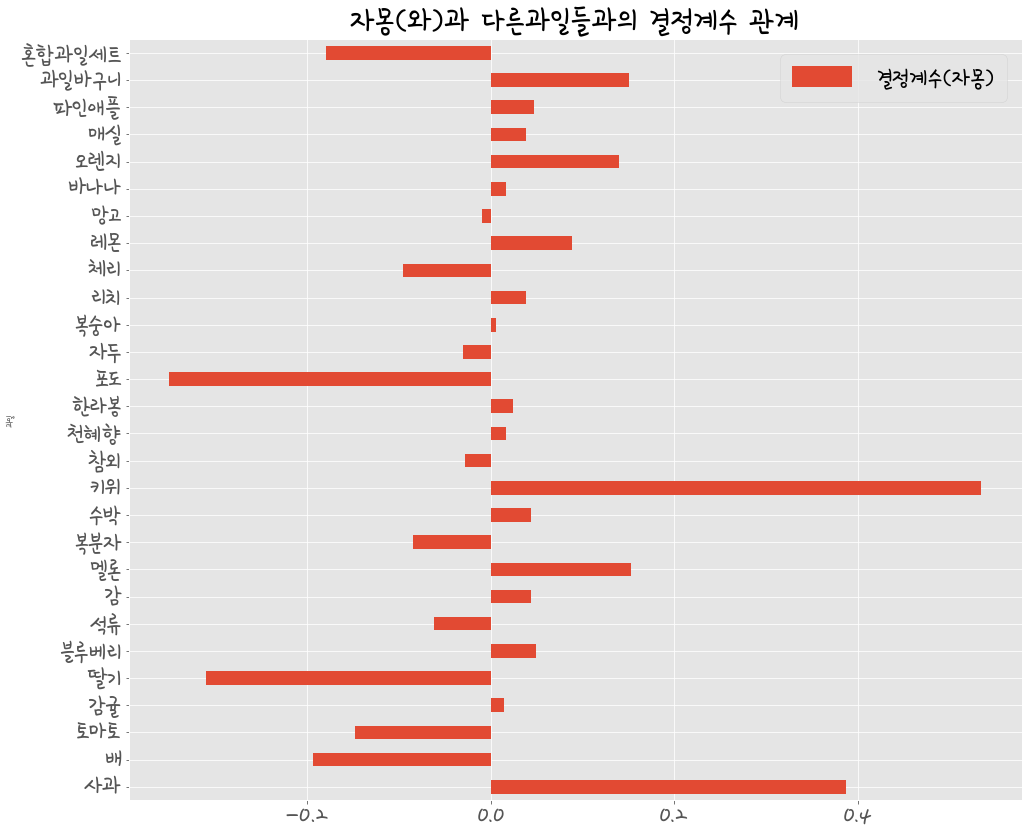

In [19]:
#결정계수 시각화
import warnings
import matplotlib
warnings.filterwarnings(action='ignore')
my_array = np.round(Rr.coef_, 3)
gang = pd.DataFrame(my_array).transpose()
nums = pd.DataFrame(num).transpose()
total = nums.append(gang).transpose()

total.columns = ['과일', '결정계수']
plt.style.use('ggplot')
total.plot('과일','결정계수', kind='barh', figsize=(16, 14), fontsize=30)
plt.title(f'{prospect_fruit}(와)과 다른과일들과의 결정계수 관계', fontsize=40)
plt.legend(labels=[f'결정계수({prospect_fruit})'], loc='best', fontsize=30)
#마이너스 부호 깨짐 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [20]:
#1. 모듈 및 함수 불러오기
from sklearn.metrics import mean_squared_error
from math import sqrt

#2. RMSE 계산
rmse= sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE: {:.3f}'.format(rmse))

RMSE: 6.569


In [26]:
df_melon = df_merge[['period', '자몽' , '키위']]
#df_melon = df_melon[(df_melon['체리'] > 30)]
df_melon = df_melon[(df_melon['자몽'] > 20) & (df_melon['키위'] > 20)]
df_melon.head(10)

,period,자몽,키위
111,2017-11-20,22.19921,20.70910
463,2018-11-07,20.68751,23.48106
468,2018-11-12,23.79374,24.80257
469,2018-11-13,24.10436,21.59548
470,2018-11-14,24.82915,21.36986
471,2018-11-15,23.64878,20.95084
475,2018-11-19,29.11575,21.16035
476,2018-11-20,25.65748,25.17324
477,2018-11-21,20.37688,20.37066
834,2019-11-13,21.18451,25.54391


Text(0.5, 0, '기간')

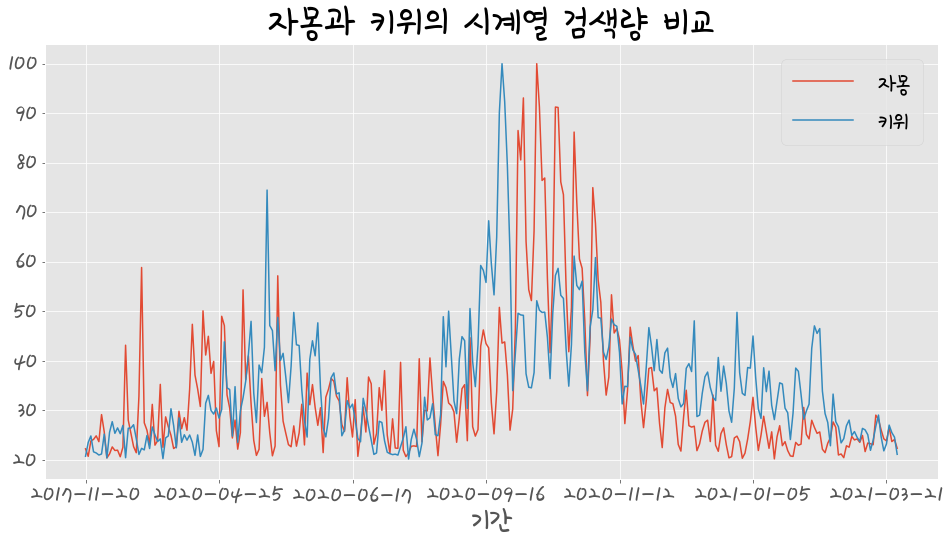

In [27]:
df_melon.plot('period', figsize=(16, 8), fontsize=30)
plt.legend(loc='best', fontsize=30)
plt.title('자몽과 키위의 시계열 검색량 비교' , fontsize=50)
plt.xlabel('기간', fontsize=40)